/home/salesbarbosa/anaconda3/lib/python3.4/site-packages/pandas/core/indexing.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/salesbarbosa/anaconda3/lib/python3.4/site-packages/pandas/core/indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


[<matplotlib.axes._subplots.AxesSubplot object at 0xa563690c>, <matplotlib.axes._subplots.AxesSubplot object at 0xa563690c>, <matplotlib.axes._subplots.AxesSubplot object at 0xa563690c>, <matplotlib.axes._subplots.AxesSubplot object at 0xa563690c>, <matplotlib.axes._subplots.AxesSubplot object at 0xa563690c>, <matplotlib.axes._subplots.AxesSubplot object at 0xa563690c>, <matplotlib.axes._subplots.AxesSubplot object at 0xa563690c>, <matplotlib.axes._subplots.AxesSubplot object at 0xa563690c>, <matplotlib.axes._subplots.AxesSubplot object at 0xa563690c>, <matplotlib.axes._subplots.AxesSubplot object at 0xa563690c>]


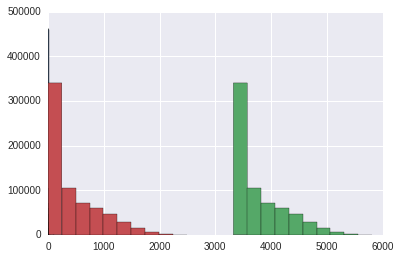

In [205]:
import pandas as pd
import numpy as np
import seaborn as sns


df = pd.read_csv("burma14.csv")
clean = df.dropna()
clean.loc[:,'delta'] = clean.loc[:,'distance'] - 3323
clean.loc[:,'%delta'] = clean.loc[:,'delta']/3323
clean.describe()
s = []
for i in clean.columns:
    s.append()
print(s)

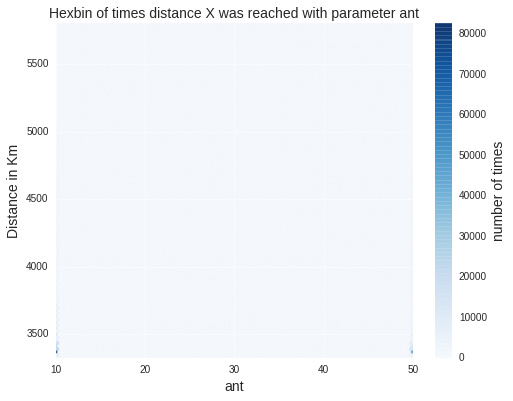

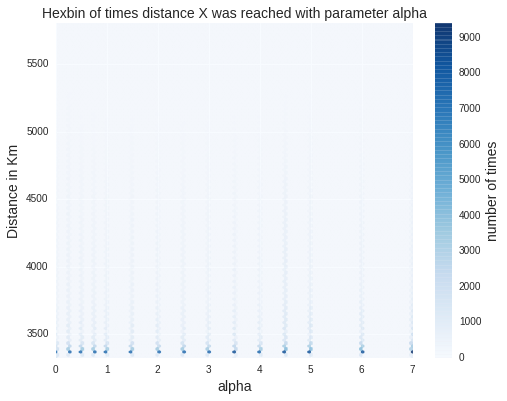

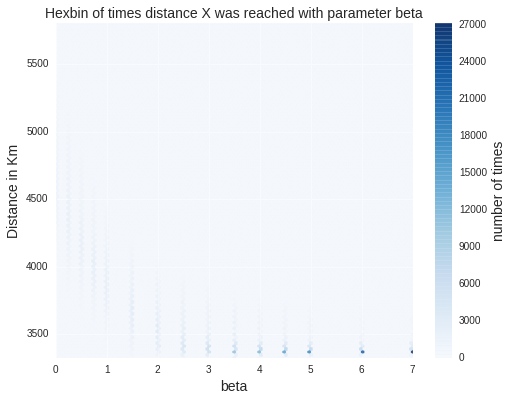

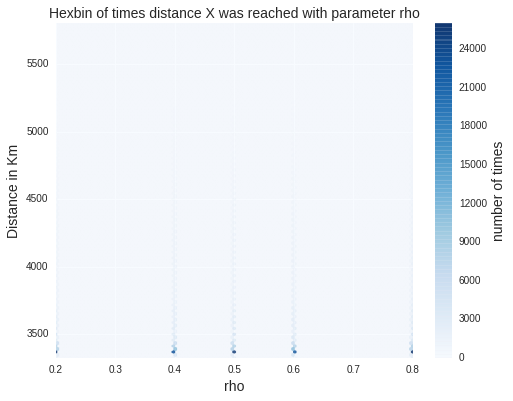

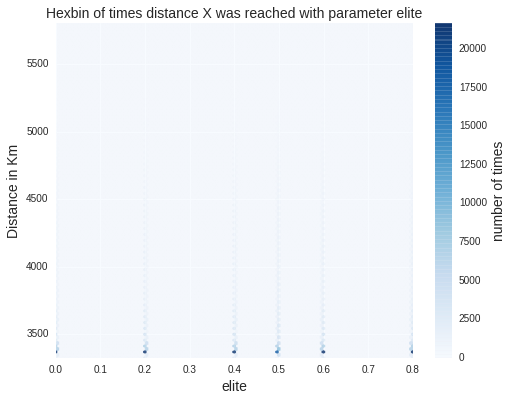

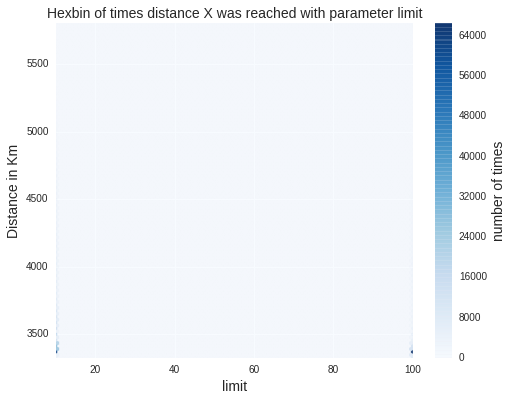

In [232]:
import matplotlib.pyplot as plt
%matplotlib inline

for name in clean.columns:
    if name in ['distance','ID','delta','%delta'] :
        continue
    fig, ax = plt.subplots(figsize=(8,6))
    #ax.axis([-0.5, 7.5,3000, 6000])
    d = ax.hexbin(clean[name],clean['distance'], cmap=plt.cm.Blues, alpha=0.8)
    plt.xlabel(name,fontsize=14)
    plt.ylabel('Distance in Km',fontsize=14)
    plt.title('Hexbin of times distance X was reached with parameter '+name,fontsize=14)
    cb = fig.colorbar(d)
    cb.set_label('number of times',fontsize=14)
    fig.savefig('plot_hexbin_'+name+'.png')


In [ ]:
for name in clean.columns:
    if name in ['distance','ID','delta','%delta'] :
        continue
    fig, ax = plt.subplots(figsize=(8,6))
    #ax.axis([-0.5, 7.5,3000, 6000])
    if name == 'alpha':
        d = ax.hexbin(clean[name],clean['distance'],mincnt=8000, cmap=plt.cm.Blues)
    else:
        d = ax.hexbin(clean[name],clean['distance'],mincnt=8000, cmap=plt.cm.Blues)
    plt.xlabel(name,fontsize=14)
    plt.ylabel('Distance in Km',fontsize=14)
    plt.title('Hexbin of times distance X was reached with parameter '+name,fontsize=14)
    cb = fig.colorbar(d)
    cb.set_label('number of times',fontsize=14)
    fig.savefig('plot_hexbin_'+name+'.png')

Intercept               4700.595689
C(Q('beta'))[T.0.25]    -236.058692
C(Q('beta'))[T.0.5]     -439.879301
C(Q('beta'))[T.0.75]    -614.858974
C(Q('beta'))[T.1.0]     -756.772939
C(Q('beta'))[T.1.5]     -956.593475
C(Q('beta'))[T.2.0]    -1078.710326
C(Q('beta'))[T.2.5]    -1151.341396
C(Q('beta'))[T.3.0]    -1195.933165
C(Q('beta'))[T.3.5]    -1224.189560
C(Q('beta'))[T.4.0]    -1241.912349
C(Q('beta'))[T.4.5]    -1254.528700
C(Q('beta'))[T.5.0]    -1262.234801
C(Q('beta'))[T.6.0]    -1273.154477
C(Q('beta'))[T.7.0]    -1278.551375
C(Q('ant'))[T.50]        -86.366615
dtype: float64
Intercept               0
C(Q('beta'))[T.0.25]    0
C(Q('beta'))[T.0.5]     0
C(Q('beta'))[T.0.75]    0
C(Q('beta'))[T.1.0]     0
C(Q('beta'))[T.1.5]     0
C(Q('beta'))[T.2.0]     0
C(Q('beta'))[T.2.5]     0
C(Q('beta'))[T.3.0]     0
C(Q('beta'))[T.3.5]     0
C(Q('beta'))[T.4.0]     0
C(Q('beta'))[T.4.5]     0
C(Q('beta'))[T.5.0]     0
C(Q('beta'))[T.6.0]     0
C(Q('beta'))[T.7.0]     0
C(Q('ant'))[T.50]  

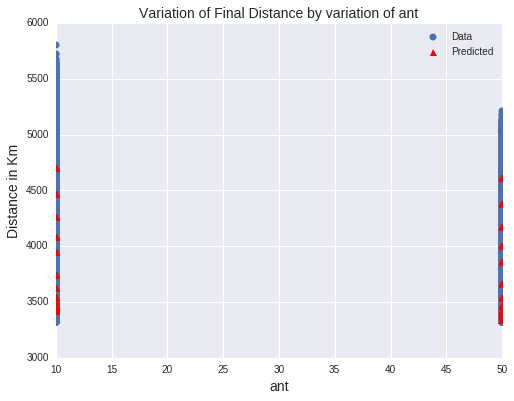

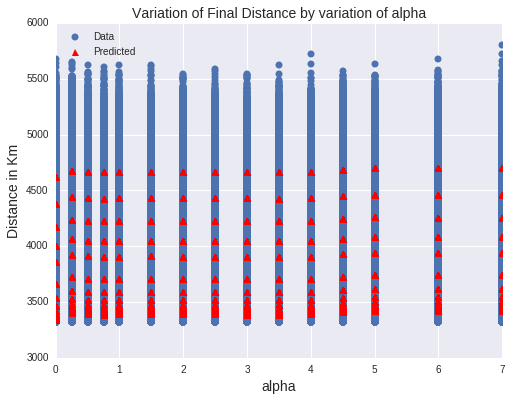

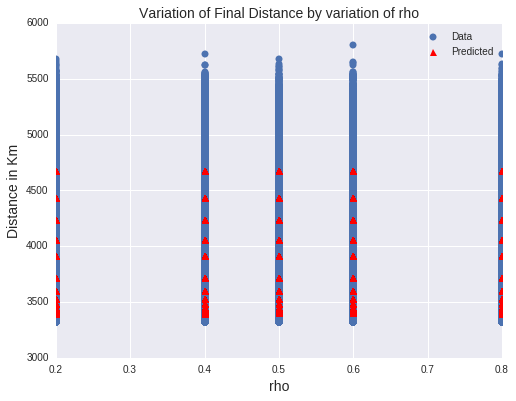

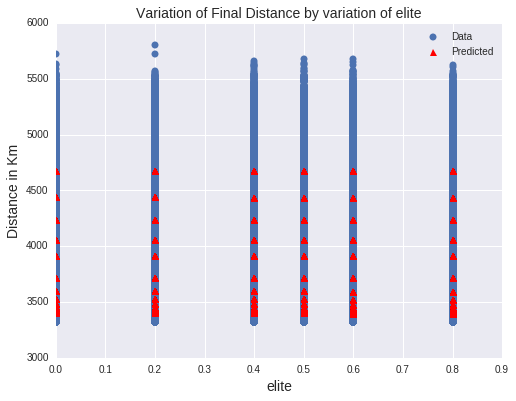

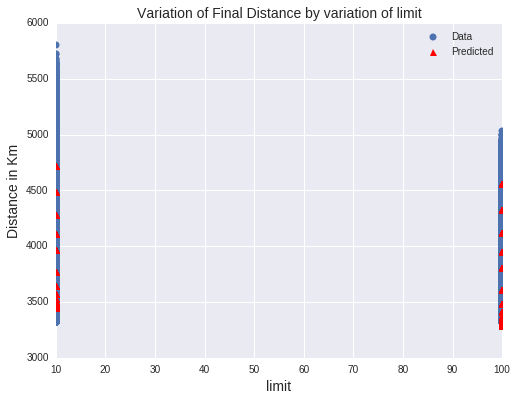

In [97]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

t = []
for name in clean.columns:
    if name in ['distance','ID','beta','delta','%delta'] :
        continue
    
    #formula = "Q('distance') ~ np.exp(Q('beta')) + C(Q('"+name+"'))"
    formula = "Q('distance') ~ (C(Q('beta')) - 1) + (C(Q('"+name+"')) - 1)"
    model = smf.ols(formula,data=clean)
    if model.nobs < len(clean)/2:
        continue
        
    results = model.fit()
        
    t.append((results.rsquared, name))
    print(results.params)
    print(results.pvalues)
    print(' ')
    print('spearman correlation distance and '+name,clean[name].corr(clean['distance'],method='spearman'))
    print('pearson correlation distance and '+name,clean[name].corr(clean['distance'],method='pearson'))
    print(' ')
    
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(clean[name], clean['distance'], 'o', label="Data")
    ax.plot(clean[name], results.fittedvalues, '^r', label="Predicted")
    plt.xlabel(name,fontsize=14)
    plt.ylabel('Distance in Km',fontsize=14)
    plt.title('Variation of Final Distance by variation of '+name,fontsize=14)
    plt.grid(True)
    legend = ax.legend(loc="best")
    fig.savefig('plot_'+name+'.png')
    
    
t.sort(reverse=True)
for mse,name in t:
    print(name,mse)

In [5]:
import statsmodels.formula.api as smf
formula0 = 'distance ~ beta'
formula1 = 'distance ~ beta+alpha'
formula2 = 'distance ~ beta+ant'
formula3 = 'distance ~ beta+limit'
formula4 = 'distance ~ beta+limit+ant'
formula5 = 'distance ~ beta+limit+ant+alpha'
formula6 = 'distance ~ beta+limit+ant+alpha+rho'
formula7 = 'distance ~ beta+limit+ant+alpha+elite'
formula8 = 'distance ~ beta+limit+ant+alpha+rho+elite'
formulas = [formula0,formula1,formula2,formula3,formula4,formula5,formula6,formula7,formula8]
t = []
models = {}
for formula in formulas:
    model = smf.ols(formula,data=clean)
    results = model.fit()
        
    t.append((results.rsquared, formula))
    models[formula] = results
    
t.sort(reverse=True)
for mse,formula in t:
    diff = mse - t[8][0]
    print(formula,mse*100,diff*100)

models[formula8].summary()

distance ~ beta+limit+ant+alpha+rho+elite 63.4144428388 5.85461093921
distance ~ beta+limit+ant+alpha+elite 63.4142642842 5.85443238461
distance ~ beta+limit+ant+alpha+rho 63.4141126329 5.85428073329
distance ~ beta+limit+ant+alpha 63.4139338767 5.85410197712
distance ~ beta+limit+ant 63.4050775738 5.84524567421
distance ~ beta+limit 60.5982735705 3.03844167089
distance ~ beta+ant 58.3160734517 0.756241552111
distance ~ beta+alpha 57.6414936988 0.0816617991738
distance ~ beta 57.5598318996 0.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               distance   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                 1.943e+05
Date:                Mon, 18 Jan 2016   Prob (F-statistic):               0.00
Time:                        08:37:25   Log-Likelihood:            -4.7293e+06
No. Observations:              672625   AIC:                         9.459e+06
Df Residuals:                  672618   BIC:                         9.459e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   4410.2442      1.422   3101.483      0.000      4407.457  4413.031
beta        -163.5939      0.158  -1034.601      0.000      -163.904  -163.284
limit         -2.6616      0.009   -304.295      0.000        -2.679    -2.644
ant           -4.4592      0.020   -227.310      0.000        -4.498    -4.421
alpha         -1.9777      0.155    -12.759      0.000        -2.282    -1.674
rho           -3.0233      1.669     -1.812      0.070        -6.294     0.247
elite         -3.1522      1.279     -2.464      0.014        -5.660    -0.645
==============================================================================
Omnibus:                    48275.150   Durbin-Watson:                   0.502
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            59389.394
Skew:                           0.703   Prob(JB):                         0.00
Kurtosis:                       3.374   Cond. No.                         345.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
models[formula4].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               distance   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                 3.885e+05
Date:                Mon, 18 Jan 2016   Prob (F-statistic):               0.00
Time:                        08:37:46   Log-Likelihood:            -4.7294e+06
No. Observations:              672625   AIC:                         9.459e+06
Df Residuals:                  672621   BIC:                         9.459e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   4400.2705      0.853   5159.215      0.000      4398.599  4401.942
beta        -163.6085      0.158  -1034.589      0.000      -163.918  -163.299
limit         -2.6447      0.009   -305.838      0.000        -2.662    -2.628
ant           -4.4341      0.020   -227.133      0.000        -4.472    -4.396
==============================================================================
Omnibus:                    48403.993   Durbin-Watson:                   0.502
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            59584.476
Skew:                           0.704   Prob(JB):                         0.00
Kurtosis:                       3.377   Cond. No.                         149.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Results for exp beta
C(Q('beta'))[0.0]        4619.104312
C(Q('beta'))[0.25]       4380.253323
C(Q('beta'))[0.5]        4176.395004
C(Q('beta'))[0.75]       4001.415331
C(Q('beta'))[1.0]        3859.501366
C(Q('beta'))[1.5]        3660.872590
C(Q('beta'))[2.0]        3539.325392
C(Q('beta'))[2.5]        3467.743069
C(Q('beta'))[3.0]        3423.151300
C(Q('beta'))[3.5]        3394.894906
C(Q('beta'))[4.0]        3377.172117
C(Q('beta'))[4.5]        3364.617198
C(Q('beta'))[5.0]        3356.950818
C(Q('beta'))[6.0]        3346.031142
C(Q('beta'))[7.0]        3340.634244
C(Q('alpha'))[T.0.25]      59.198425
C(Q('alpha'))[T.0.5]       48.727686
C(Q('alpha'))[T.0.75]      47.148254
C(Q('alpha'))[T.1.0]       47.661044
C(Q('alpha'))[T.1.5]       48.375588
C(Q('alpha'))[T.2.0]       47.655933
C(Q('alpha'))[T.2.5]       47.417563
C(Q('alpha'))[T.3.0]       47.357217
C(Q('alpha'))[T.3.5]       46.700106
C(Q('alpha'))[T.4.0]       47.407588
C(Q('alpha'))[T.4.5]       66.803699
C(Q('alpha'))[T.5

TypeError: 'int' object is not iterable

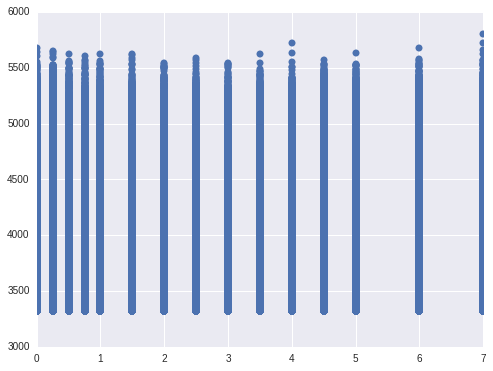

In [186]:

formula = "Q('delta') ~ np.exp(Q('beta'))"
formula = "Q('distance') ~ (C(Q('beta')) - 1) + (C(Q('alpha')) - 1)"

model = smf.ols(formula,data=clean)
results = model.fit()

print('Results for exp beta')
print(results.params)
#print(results.rsquared)
#print(results.pvalues)
print(' ')
print('spearman correlation distance and exp(beta)',np.exp(clean['beta']).corr(clean['distance'],method='spearman'))
print(' ')

betas = np.array((0,0.25,0.5,0.75,1,1.5,2,2.5,3,3.5,4,4.5,5,6,7))
alpha = np.array((0,0.25,0.5,0.75,1,1.5,2,2.5,3,3.5,4,4.5,5,6,7))
beta = [(beta,i) for beta in betas for i in alpha]
    
df = pd.DataFrame(beta, columns=['beta','alpha'])
df.head(5)
x = df.loc[df.loc[:,'beta']==0]
print(results.predict(x))

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(clean['alpha'], clean['distance'], 'o', label="Data")
for i in alpha:
    x = df.loc[df.loc[:,'beta']==i]
    ax.plot(x['alpha'],results.predict(x) , '^', label="Predicted")
plt.xlabel('exp(beta)',fontsize=14)
plt.ylabel('Distance - Optimal in Km',fontsize=14)
plt.title('Variation of  Delta by variation of exp(beta)',fontsize=14)
plt.grid(True)
legend = ax.legend(loc="best")
fig.savefig('plot_exp(beta).png')


[  1.29245249e+03  -9.04499696e-01   7.13183928e+01]


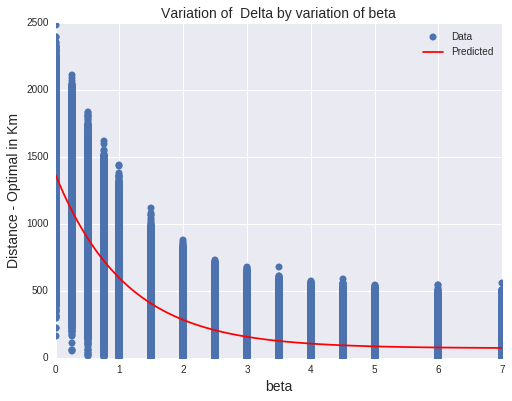

In [68]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(b * x) + c

p0 = [1292.45,-0.904,71.31]

#xdata['beta'] = clean[:,'beta':'beta']
#xdata['limit'] = clean.limit.copy()
popt, pcov = curve_fit(func, clean['beta'],clean['delta'],p0=p0 )
print(popt)

x = np.linspace(0,7,100)
y = func(x, *popt)

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(clean['beta'],clean['delta'],'o',label='Data')
plt.plot(x,y,'r',label='Predicted')
plt.xlabel('beta',fontsize=14)
plt.ylabel('Distance - Optimal in Km',fontsize=14)
plt.title('Variation of  Delta by variation of beta',fontsize=14)
plt.grid(True)
legend = ax.legend(loc="best")
plt.savefig('reg_beta_delta.png')


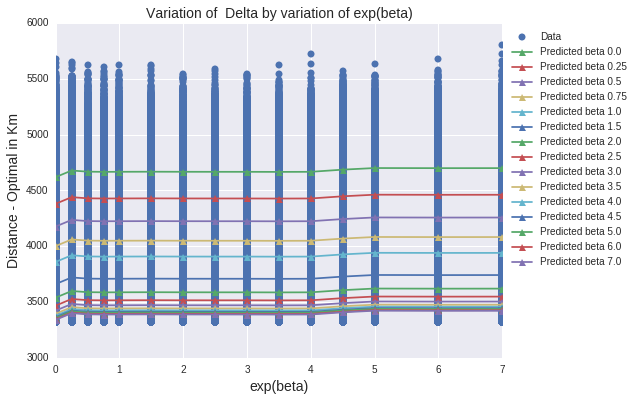

In [202]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(clean['alpha'], clean['distance'], 'o', label="Data")
for beta in betas:
    x = df.loc[df.loc[:,'beta']==beta]
    ax.plot(x['alpha'],results.predict(x) , '^-', label="Predicted beta "+str(beta))
plt.xlabel('exp(beta)',fontsize=14)
plt.ylabel('Distance - Optimal in Km',fontsize=14)
plt.title('Variation of  Delta by variation of exp(beta)',fontsize=14)
plt.grid(True)
legend = ax.legend(loc="upper right",bbox_to_anchor=(1.3, 1.0))
fig.savefig('plot_alpha_beta.png')

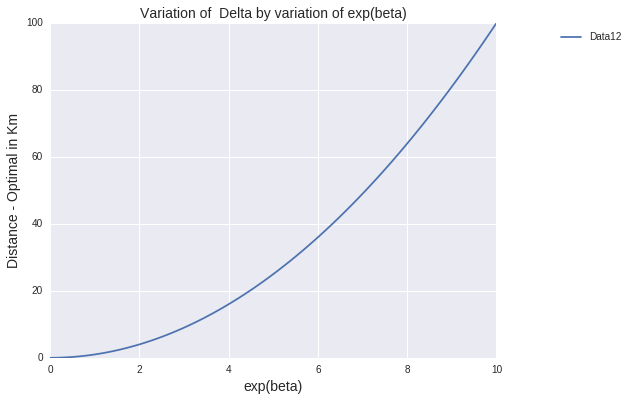

In [198]:
fig, ax = plt.subplots(figsize=(8,6))
x = np.linspace(0,10,100)
y = x**2
ax.plot(x,y, '-', label="Data"+str(12))
plt.xlabel('exp(beta)',fontsize=14)
plt.ylabel('Distance - Optimal in Km',fontsize=14)
plt.title('Variation of  Delta by variation of exp(beta)',fontsize=14)
plt.grid(True)
legend = ax.legend(loc="upper right",bbox_to_anchor=(1.3, 1.0))
fig.savefig('plot_exp(beta).png')

In [185]:
betas = np.array((0,0.25,0.5,0.75,1,1.5,2,2.5,3,3.5,4,4.5,5,6,7))
alpha = np.array((0,0.25,0.5,0.75,1,1.5,2,2.5,3,3.5,4,4.5,5,6,7))
beta = [(beta,i) for beta in betas for i in alpha]
    
df = pd.DataFrame(beta, columns=['beta','alpha'])
df.head(5)
x = df.loc[df.loc[:,'beta']==0]
print(results.predict(x))

[ 4619.10431199  4678.30273671  4667.83199836  4666.25256626  4666.76535638
  4667.47989959  4666.76024527  4666.5218749   4666.46152922  4665.80441811
  4666.51189959  4685.90801066  4700.38206009  4699.36118972  4699.66661564]
